<a href="https://colab.research.google.com/github/MehrdadJalali-AI/Statistics-and-Machine-Learning/blob/main/Day13_15_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-4d3201cc7eb5>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2000-01-01', periods=len(data), freq='M'),


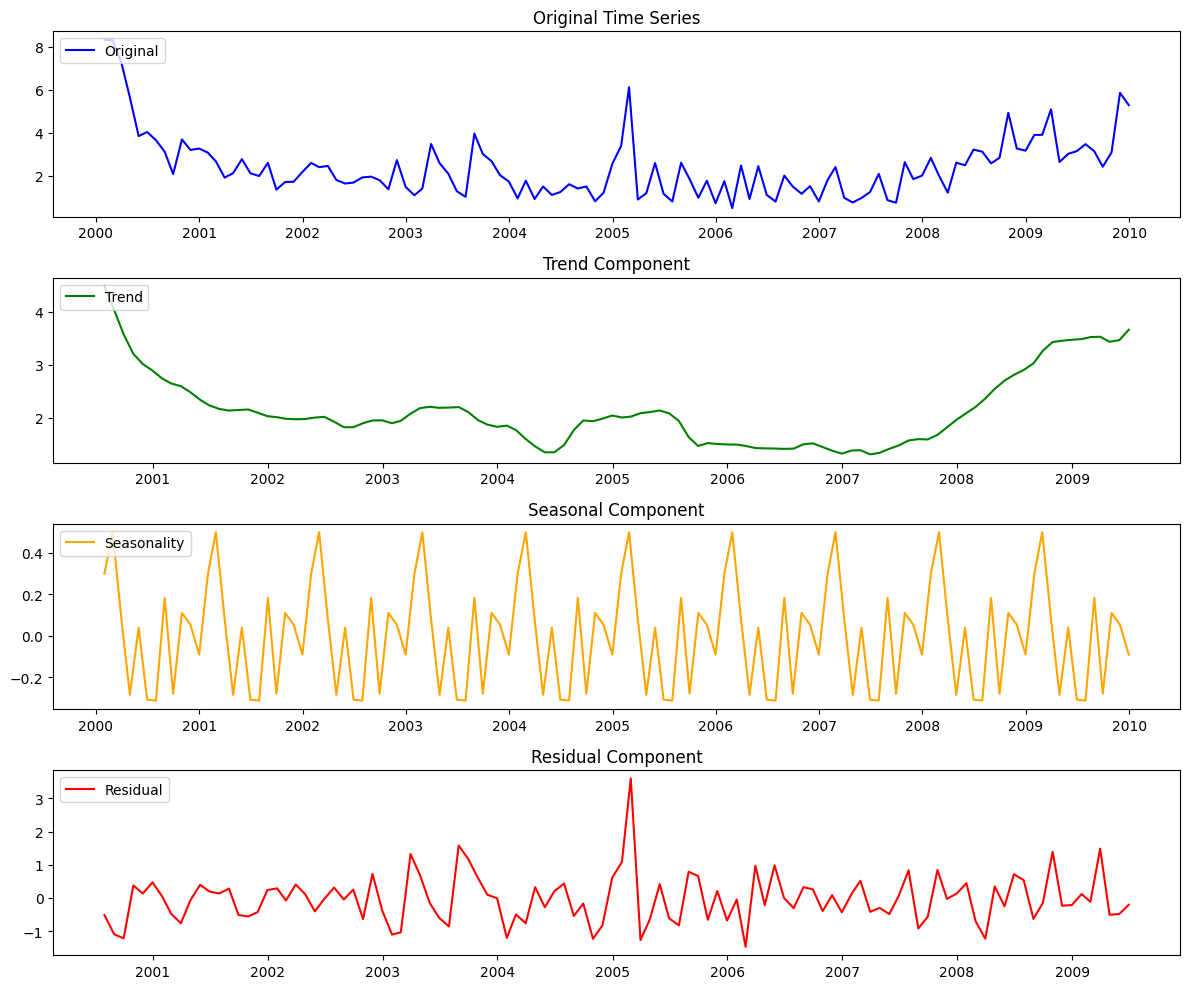

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load California Housing Dataset
housing = fetch_california_housing(as_frame=True)
data = housing['data']['MedInc'][:120]  # Truncate to the first 120 data points (10 years of monthly data)

# Simulate a Time Series
time_series_data = pd.DataFrame({
    'Date': pd.date_range(start='2000-01-01', periods=len(data), freq='M'),
    'Value': data
}).set_index('Date')

# Step 2: Decompose the Time Series
time_series = time_series_data['Value']  # Extract the series for decomposition
decomposition = seasonal_decompose(time_series, model='additive', period=12)  # Assume monthly periodicity

# Extract Components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Step 3: Plot the Components
plt.figure(figsize=(12, 10))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original', color='blue')
plt.title('Original Time Series')
plt.legend(loc='upper left')

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend(loc='upper left')

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


<ipython-input-7-83a3f3a94f41>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2000-01-01', periods=len(data), freq='M'),


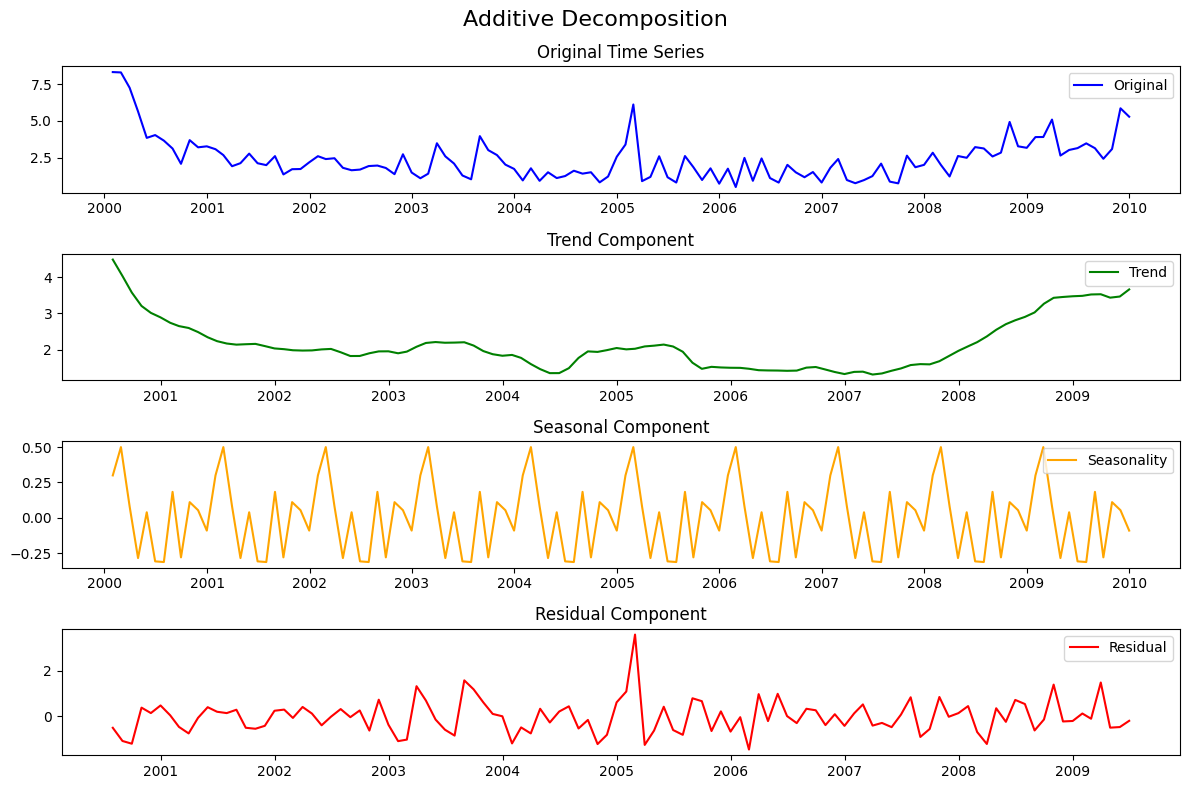

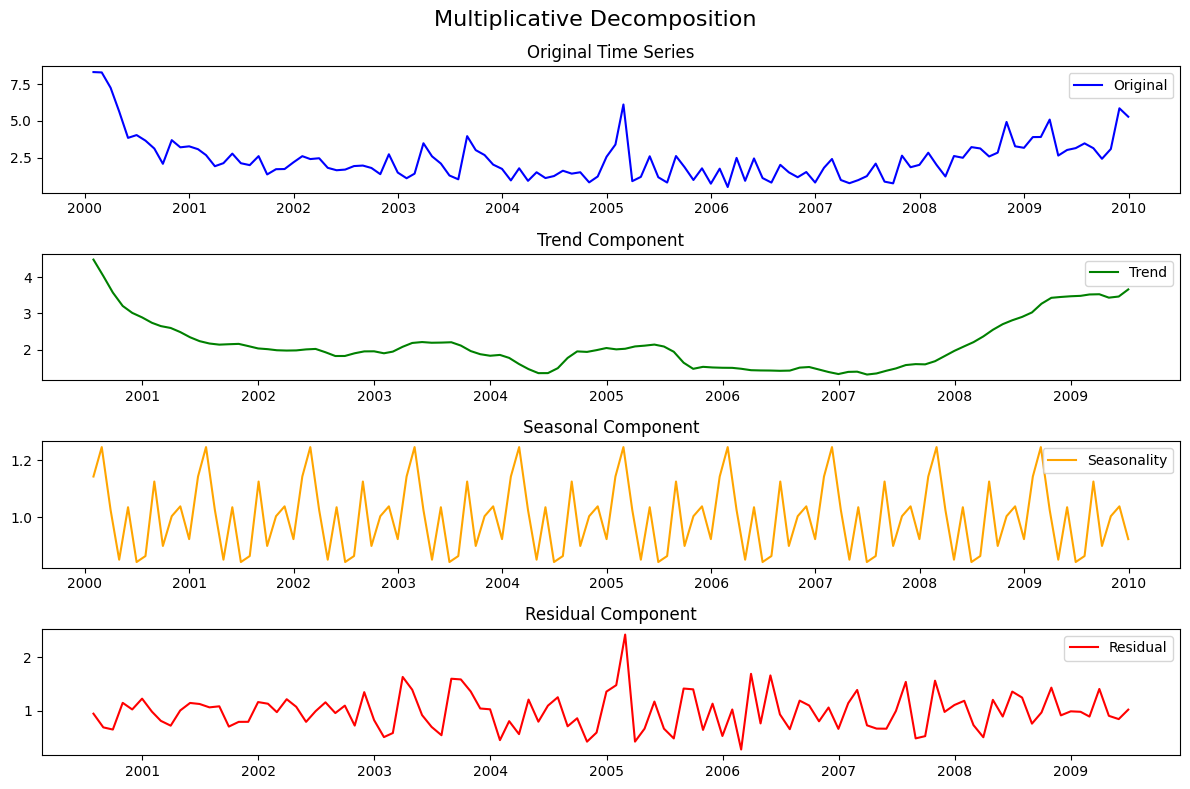

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Load California Housing Dataset
housing = fetch_california_housing(as_frame=True)
data = housing['data']['MedInc'][:120]  # Truncate to the first 120 data points (10 years of monthly data)

# Simulate a Time Series
time_series_data = pd.DataFrame({
    'Date': pd.date_range(start='2000-01-01', periods=len(data), freq='M'),
    'Value': data
}).set_index('Date')

time_series = time_series_data['Value']  # Extract the time series data

# Step 2: Additive Decomposition
additive_decomposition = seasonal_decompose(time_series, model='additive', period=12)

# Step 3: Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(time_series, model='multiplicative', period=12)

# Step 4: Plot Additive Decomposition
plt.figure(figsize=(12, 8))
plt.suptitle('Additive Decomposition', fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original', color='blue')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(additive_decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(additive_decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(additive_decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Plot Multiplicative Decomposition
plt.figure(figsize=(12, 8))
plt.suptitle('Multiplicative Decomposition', fontsize=16)

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original', color='blue')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(multiplicative_decomposition.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(multiplicative_decomposition.seasonal, label='Seasonality', color='orange')
plt.title('Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(multiplicative_decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()


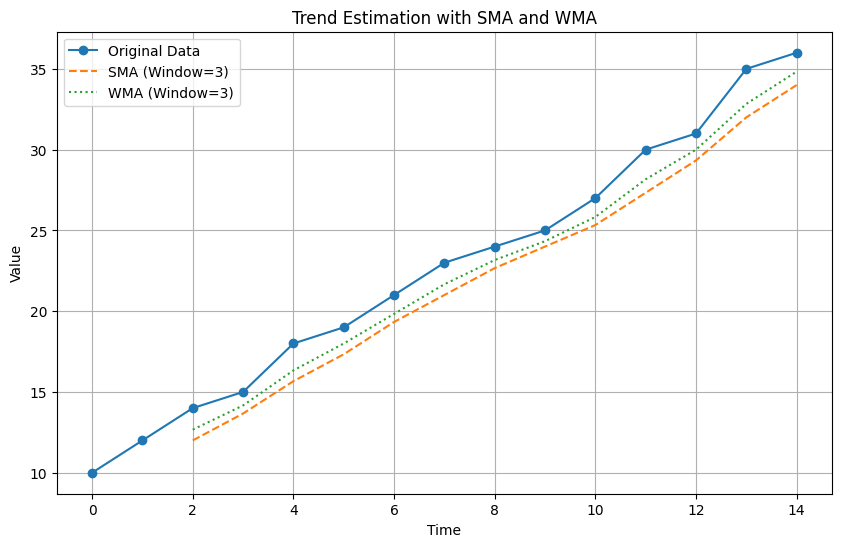

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data: A time series (can be replaced with your dataset)
data = [10, 12, 14, 15, 18, 19, 21, 23, 24, 25, 27, 30, 31, 35, 36]
time_series = pd.Series(data)

# Simple Moving Average (SMA) function
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# Weighted Moving Average (WMA) function
def calculate_wma(data, window):
    weights = np.arange(1, window + 1)
    return data.rolling(window=window).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

# Parameters
window_size = 3  # Adjust the window size as needed

# Calculate SMA and WMA
sma = calculate_sma(time_series, window_size)
wma = calculate_wma(time_series, window_size)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Original Data", marker="o")
plt.plot(sma, label=f"SMA (Window={window_size})", linestyle="--")
plt.plot(wma, label=f"WMA (Window={window_size})", linestyle=":")
plt.title("Trend Estimation with SMA and WMA")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


<ipython-input-3-0cc6f2ab1af4>:19: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)


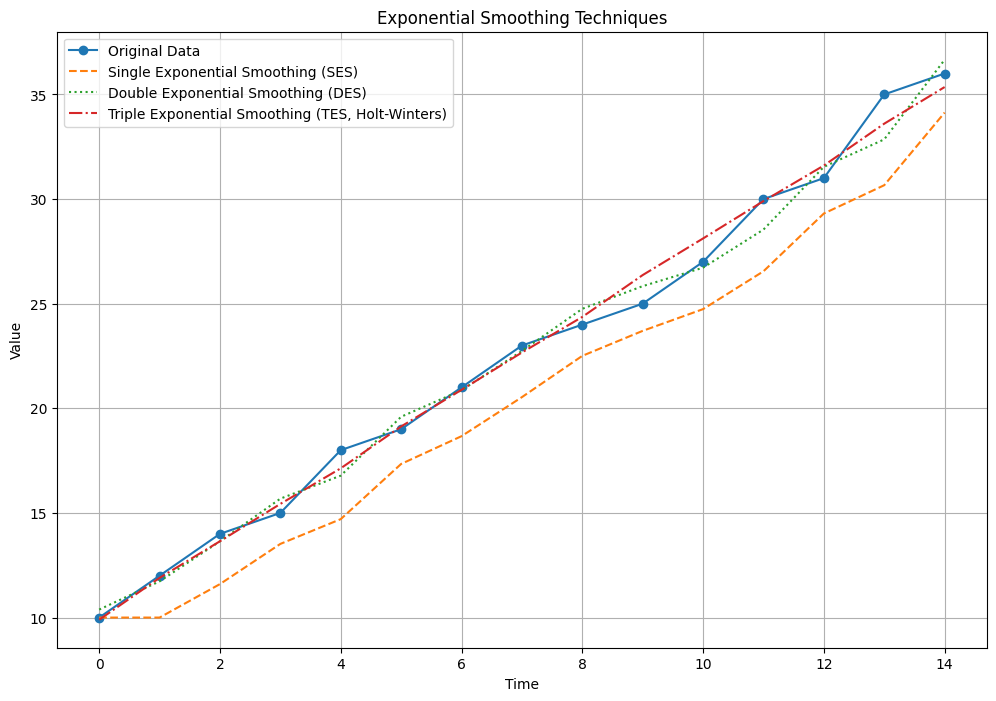

SES Forecast: 15    35.626477
16    35.626477
17    35.626477
dtype: float64
DES Forecast: 15    38.114646
16    40.097530
17    42.080414
dtype: float64
TES Forecast: 15    37.137215
16    38.838271
17    40.838230
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Sample data: A time series (can be replaced with your dataset)
data = [10, 12, 14, 15, 18, 19, 21, 23, 24, 25, 27, 30, 31, 35, 36]
time_series = pd.Series(data)

# 1. Single Exponential Smoothing (SES)
def single_exponential_smoothing(data, smoothing_level=0.8):
    model = SimpleExpSmoothing(data)
    fitted_model = model.fit(smoothing_level=smoothing_level, optimized=False)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# 2. Double Exponential Smoothing (DES)
def double_exponential_smoothing(data, trend="add", smoothing_level=0.8, smoothing_slope=0.2):
    model = ExponentialSmoothing(data, trend=trend, seasonal=None)
    fitted_model = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, optimized=False)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# 3. Triple Exponential Smoothing (Holt-Winters, TES)
def triple_exponential_smoothing(data, trend="add", seasonal="add", seasonal_periods=4):
    model = ExponentialSmoothing(data, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fitted_model = model.fit(optimized=True)
    return fitted_model.fittedvalues, fitted_model.forecast(steps=3)

# Apply smoothing methods
smoothing_level = 0.8
smoothing_slope = 0.2
seasonal_periods = 4

ses_fitted, ses_forecast = single_exponential_smoothing(time_series, smoothing_level)
des_fitted, des_forecast = double_exponential_smoothing(time_series, "add", smoothing_level, smoothing_slope)
tes_fitted, tes_forecast = triple_exponential_smoothing(time_series, "add", "add", seasonal_periods=seasonal_periods)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(time_series, label="Original Data", marker="o")
plt.plot(ses_fitted, label="Single Exponential Smoothing (SES)", linestyle="--")
plt.plot(des_fitted, label="Double Exponential Smoothing (DES)", linestyle=":")
plt.plot(tes_fitted, label="Triple Exponential Smoothing (TES, Holt-Winters)", linestyle="-.")
plt.title("Exponential Smoothing Techniques")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Forecast Output
print("SES Forecast:", ses_forecast)
print("DES Forecast:", des_forecast)
print("TES Forecast:", tes_forecast)


**Auto-Regressive (AR) model**

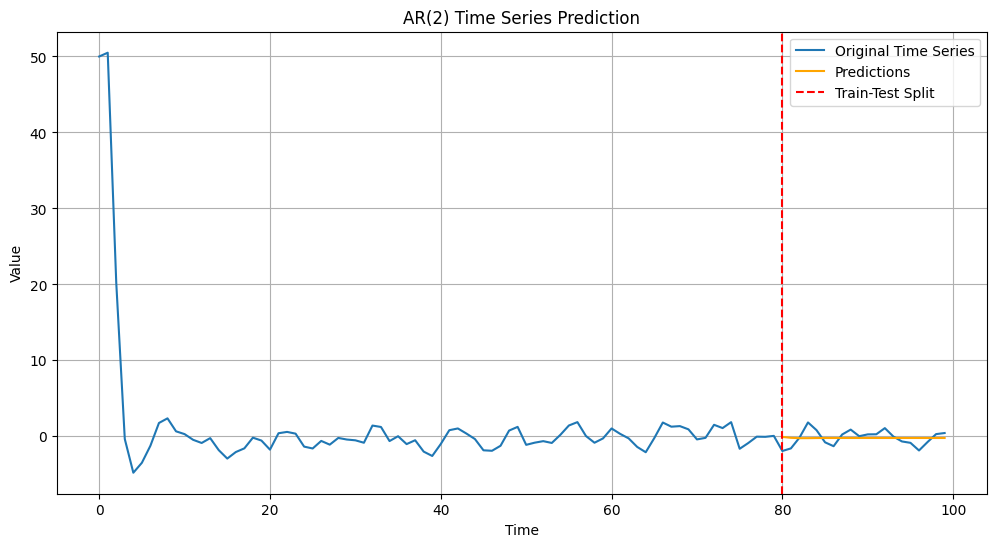

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                   80
Model:                     AutoReg(2)   Log Likelihood                -104.548
Method:               Conditional MLE   S.D. of innovations              0.924
Date:                Wed, 11 Dec 2024   AIC                            217.097
Time:                        08:38:06   BIC                            226.523
Sample:                             2   HQIC                           220.870
                                   80                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1301      0.106     -1.227      0.220      -0.338       0.078
Value.L1       0.6603      0.033     19.728      0.000       0.595       0.726
Value.L2      -0.2630      0.025    -10.496      0.0

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Generate a synthetic time series dataset
np.random.seed(42)
n = 100  # Number of time steps
data = [50]  # Initial value
for _ in range(1, n):
    noise = np.random.normal(0, 1)
    data.append(0.7 * data[-1] - 0.3 * data[-2] + noise if len(data) > 1 else data[-1] + noise)

# Convert data to pandas series
time_series = pd.Series(data, name="Value")

# Split the dataset into training and test sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit an Auto-Regressive (AR) model
model = AutoReg(train, lags=2)  # AR(2) model
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label="Original Time Series")
plt.plot(test.index, predictions, label="Predictions", color="orange")
plt.axvline(x=train_size, color="red", linestyle="--", label="Train-Test Split")
plt.legend()
plt.title("AR(2) Time Series Prediction")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.show()

# Print model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/pyth

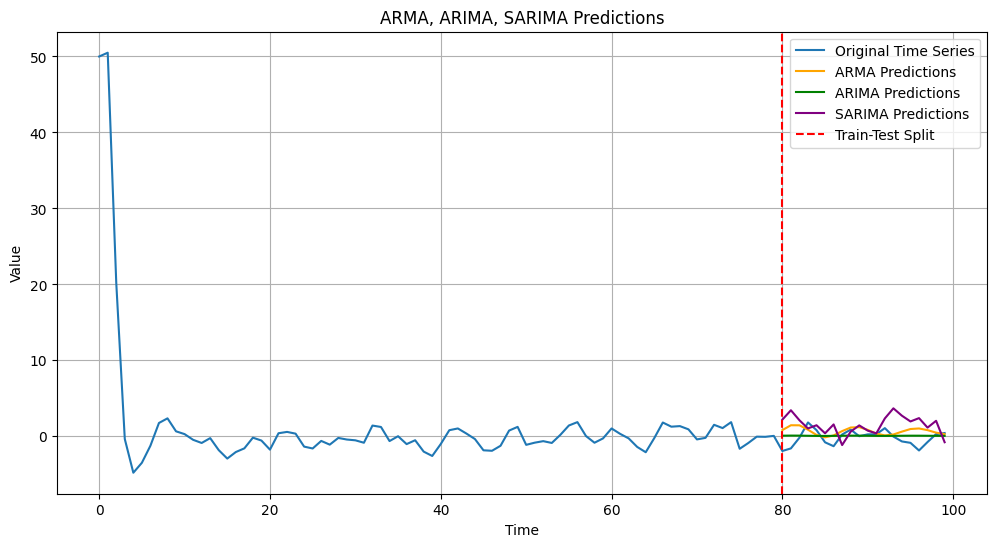

In [3]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Generate a synthetic time series dataset
np.random.seed(42)
n = 100  # Number of time steps
data = [50]  # Initial value
for _ in range(1, n):
    noise = np.random.normal(0, 1)
    data.append(0.7 * data[-1] - 0.3 * data[-2] + noise if len(data) > 1 else data[-1] + noise)

# Convert data to pandas series
time_series = pd.Series(data, name="Value")

# Split the dataset into training and test sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# ==================== ARMA Model ==================== #
# Fit an ARMA(2, 2) model
# Uses the last two lagged values (p=2) and the last two error terms (q=2) for stationary data without differencing (d=0).
arma_model = ARIMA(train, order=(2, 0, 2))  # ARMA is ARIMA with d=0

arma_fit = arma_model.fit()
arma_predictions = arma_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# ==================== ARIMA Model ==================== #
# Fit an ARIMA(2, 1, 2) model
arima_model = ARIMA(train, order=(2, 1, 2))  # ARIMA model with differencing
arima_fit = arima_model.fit()
arima_predictions = arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ="levels")

# ==================== SARIMA Model ==================== #
# Fit a SARIMA(2, 1, 2)(1, 1, 1, 12) model
sarima_model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
sarima_predictions = sarima_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# ==================== Plot Predictions ==================== #
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label="Original Time Series")
plt.plot(test.index, arma_predictions, label="ARMA Predictions", color="orange")
plt.plot(test.index, arima_predictions, label="ARIMA Predictions", color="green")
plt.plot(test.index, sarima_predictions, label="SARIMA Predictions", color="purple")
plt.axvline(x=train_size, color="red", linestyle="--", label="Train-Test Split")
plt.legend()
plt.title("ARMA, ARIMA, SARIMA Predictions")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.show()


**Prophet model**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwitdjxcu/e2zzyvng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwitdjxcu/s1o4rkz4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1655', 'data', 'file=/tmp/tmpwitdjxcu/e2zzyvng.json', 'init=/tmp/tmpwitdjxcu/s1o4rkz4.json', 'output', 'file=/tmp/tmpwitdjxcu/prophet_modelbynjpoj6/prophet_model-20241211091938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:19:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:19:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


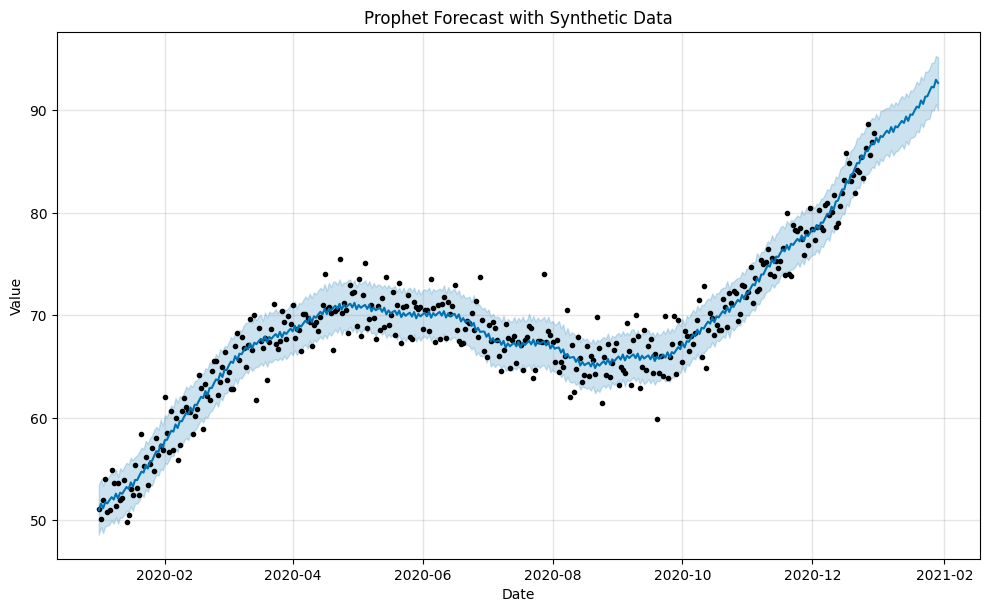

In [2]:
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=365, freq="D")
values = 50 + 0.1 * np.arange(365) + 10 * np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, 2, 365)

# Prepare the data for Prophet
data = pd.DataFrame({
    "ds": dates,  # Date column
    "y": values   # Value column
})

# Fit the Prophet model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(data)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=30)  # Forecast 30 days into the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Prophet Forecast with Synthetic Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()
